<a href="https://colab.research.google.com/github/cheng3100/mygadget/blob/master/helloworld_tflite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. prepare tensorflow python env


In [2]:
# install tensorflow pip package
!pip install -q tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 61.7 MB/s eta 0:00:00


2. prepare the train input for this model

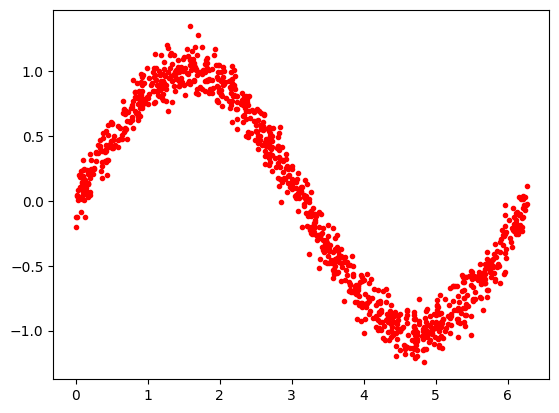

In [4]:
# 2.1 basic
import numpy as np
import math

np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

SAMPLE_SIZE=1000
x_values=np.random.uniform(low=0, high=2*math.pi, size=SAMPLE_SIZE).astype(np.float32)

# shuffle is need to guarantee they're not in order
np.random.shuffle(x_values)

y_values=np.sin(x_values).astype(np.float32)

# [plot] plot the origin input sine wave dataset
# [adjust] add some random shift/noise to sine y
import matplotlib.pyplot as plt
y_values += 0.1 * np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'r.')

# 2.2 split to train/validation/test
x_train,x_test = np.split(x_values, [int(0.8*SAMPLE_SIZE)])
y_train,y_test = np.split(y_values, [int(0.8*SAMPLE_SIZE)])

3. create model

In [5]:
# `sequential` means data flow from input to output layer by layer.
# compare to other model?
model = tf.keras.Sequential()

# add a 16 tensor(neuron) `dense` layer, dense means full connection.
# Because it is a sequential model so only the input layer need to set the
# input_shape
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)))

model.add(tf.keras.layers.Dense(16, activation='relu'))

# TODO how if we still set a activation to the output tensor?
#model.add(tf.keras.layers.Dense(1, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# compile
# TODO compare with other optimizer in Keras's doc
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 4. train model

In [7]:
EPOCHS=1000

# TODO try another validation data input
#model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(), batch_size=16,verbose=2)
ret = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.3, batch_size=16,verbose=2)

model.save("helloworld.tf", save_format="tf")

Epoch 1/1000
35/35 - 1s - loss: 0.5201 - mae: 0.6276 - val_loss: 0.4051 - val_mae: 0.5370 - 863ms/epoch - 25ms/step
Epoch 2/1000
35/35 - 0s - loss: 0.3975 - mae: 0.5347 - val_loss: 0.3488 - val_mae: 0.5062 - 80ms/epoch - 2ms/step
Epoch 3/1000
35/35 - 0s - loss: 0.3434 - mae: 0.4995 - val_loss: 0.2960 - val_mae: 0.4670 - 84ms/epoch - 2ms/step
Epoch 4/1000
35/35 - 0s - loss: 0.2919 - mae: 0.4586 - val_loss: 0.2557 - val_mae: 0.4373 - 82ms/epoch - 2ms/step
Epoch 5/1000
35/35 - 0s - loss: 0.2466 - mae: 0.4216 - val_loss: 0.2112 - val_mae: 0.3967 - 76ms/epoch - 2ms/step
Epoch 6/1000
35/35 - 0s - loss: 0.2034 - mae: 0.3864 - val_loss: 0.1755 - val_mae: 0.3611 - 81ms/epoch - 2ms/step
Epoch 7/1000
35/35 - 0s - loss: 0.1716 - mae: 0.3504 - val_loss: 0.1607 - val_mae: 0.3396 - 79ms/epoch - 2ms/step
Epoch 8/1000
35/35 - 0s - loss: 0.1465 - mae: 0.3210 - val_loss: 0.1298 - val_mae: 0.3041 - 91ms/epoch - 3ms/step
Epoch 9/1000
35/35 - 0s - loss: 0.1274 - mae: 0.2952 - val_loss: 0.1170 - val_mae: 0.2

KeyboardInterrupt: ignored

# 5. show the train result